### Import libraries

In [1]:
# Step 1: Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset and Encode SNP genotypes & eye color 

###### 🧬 What Are SNPs?
SNPs are single base-pair variations in the DNA sequence. Certain SNPs are strongly associated with traits, like eye color.

For example:

rs12913832 in the HERC2 gene is the strongest known predictor of blue vs. brown eyes.

rs1800407 in the OCA2 gene also plays a significant role.

Others like rs12896399 and rs16891982 have smaller effects.



In [3]:
# Step 2: Load the dataset
df = pd.read_csv("C:/Users/atiyv/Downloads/synthetic_eye_color_dataset.csv") 
df.head()

# Step 3: Encode SNP genotypes (categorical to numeric)
snp_columns = df.columns[:-1]  # All columns except 'eye_color'
label_encoders = {}

for col in snp_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for possible inverse_transform

# Step 4: Encode target label (eye_color)
target_encoder = LabelEncoder()
df["eye_color_encoded"] = target_encoder.fit_transform(df["eye_color"])


### Split the dataset & Training the model

###### 🧠 Build the ML Dataset
Extract SNP values from each user's DNA file.

Label each sample with their reported eye color.

One-hot encode or map SNPs to numeric values:

AA → 0

AG → 1

GG → 2

Train a classifier:

Random Forest 

In [5]:
# Step 5: Split features and target
X = df[snp_columns]
y = df["eye_color_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation Report

Classification Report:
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       319
       brown       1.00      1.00      1.00      1047
       green       1.00      1.00      1.00       634

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



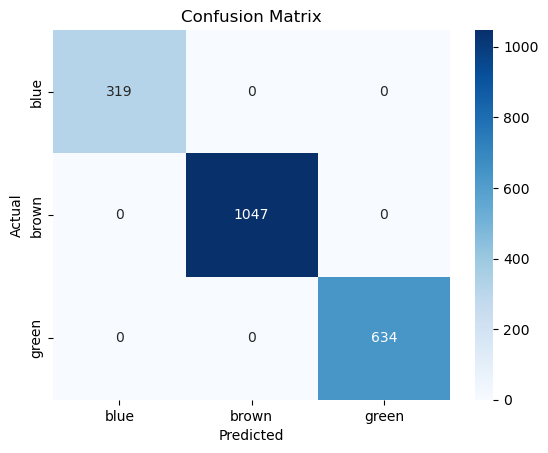

In [6]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Application

In [7]:
#                                        User Input for Eye Color Prediction

def predict_eye_color_from_input(model, encoders, target_encoder):
    print("\n🔍 Predict Eye Color from SNP Genotypes")

    user_input = {}

    for snp, encoder in encoders.items():
        valid_genotypes = list(encoder.classes_)
        print(f"\n{snp} - Valid genotypes: {valid_genotypes}")
        
        while True:
            value = input(f"Enter genotype for {snp}: ").strip().upper()
            if value in valid_genotypes:
                user_input[snp] = encoder.transform([value])[0]
                break
            else:
                print(f"⚠️ Invalid input. Please enter one of {valid_genotypes}.")

    # Convert input to DataFrame
    user_df = pd.DataFrame([user_input])
    
    # Predict
    prediction = model.predict(user_df)
    predicted_label = target_encoder.inverse_transform(prediction)[0]

    print(f"\n🎯 Predicted Eye Color: {predicted_label}")

# Call the function
predict_eye_color_from_input(model, label_encoders, target_encoder)



🔍 Predict Eye Color from SNP Genotypes

rs12913832 - Valid genotypes: ['AA', 'AG', 'GG']
Enter genotype for rs12913832: AG

rs1800407 - Valid genotypes: ['CC', 'CT', 'TT']
Enter genotype for rs1800407: TT

rs12896399 - Valid genotypes: ['AA', 'GA', 'GG']
Enter genotype for rs12896399: AA

rs16891982 - Valid genotypes: ['CC', 'CG', 'GG']
Enter genotype for rs16891982: CG

rs12203592 - Valid genotypes: ['CC', 'TC', 'TT']
Enter genotype for rs12203592: TC

rs1393350 - Valid genotypes: ['AA', 'GA', 'GG']
Enter genotype for rs1393350: GG

rs7495174 - Valid genotypes: ['AA', 'AG', 'GG']
Enter genotype for rs7495174: AA

rs1129038 - Valid genotypes: ['CC', 'TC', 'TT']
Enter genotype for rs1129038: TT

🎯 Predicted Eye Color: brown


###  Feature Importance

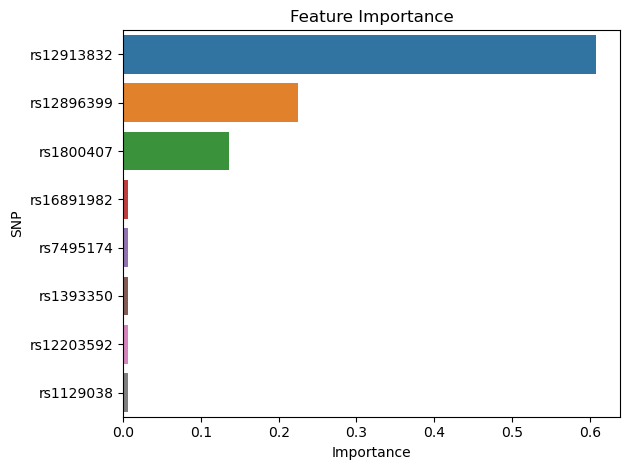

In [8]:
# Step 8: Feature importance
importances = model.feature_importances_
feat_df = pd.DataFrame({
    "SNP": snp_columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="SNP", data=feat_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()